In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

In [44]:
df=pd.read_csv("Cars_dataset.xls",index_col=0)

In [45]:
df.head()

,Kms_driven,Petrol_Diesel,Car_Type,Car_owner_Type,Price,Manufacture Year,Brand
0,59.27k km,Petrol,Manual,"('2nd', ' owner')",₹2.73 lakh,2015.0,Hyundai i10
1,46.89k km,Petrol,Manual,"('1st', ' owner')",₹2.62 lakh,2013.0,Maruti Wagon R 1.0
2,21.27k km,Petrol,Manual,"('1st', ' owner')",₹2.37 lakh,2016.0,Renault Kwid
3,41.20k km,Petrol,Manual,"('2nd', ' owner')",₹2.27 lakh,2016.0,Renault Kwid
4,39.74k km,Petrol,Manual,"('1st', ' owner')",₹2.74 lakh,2016.0,Maruti Alto K10


In [46]:
df.shape

(874, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 874 entries, 0 to 873
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kms_driven        721 non-null    object 
 1   Petrol_Diesel     874 non-null    object 
 2   Car_Type          874 non-null    object 
 3   Car_owner_Type    828 non-null    object 
 4   Price             848 non-null    object 
 5   Manufacture Year  665 non-null    float64
 6   Brand             665 non-null    object 
dtypes: float64(1), object(6)
memory usage: 54.6+ KB


In [7]:
df["Car_owner_Type"] = df['Car_owner_Type'].str.replace(",","")

In [8]:
df["Car_owner_Type"] = df['Car_owner_Type'].str.replace(",","")

In [9]:
df["Car_owner_Type"] = df['Car_owner_Type'].str.replace("' '"," ")

In [10]:
df["Car_owner_Type"] = df['Car_owner_Type'].str.replace("'"," ")

In [11]:
df["Car_owner_Type"] = df['Car_owner_Type'].str.replace(")","")

In [12]:
df["Car_owner_Type"] = df['Car_owner_Type'].str.replace("(","")

In [13]:
df["Kms_driven"] = df['Kms_driven'].str.replace("m","")

In [48]:
df["Price"] = df["Price"].apply(lambda x : re.findall(r"₹\d+\.\d+\slakh",str(x))[0] if re.findall(r"₹\d+\.\d+\slakh",str(x)) else np.nan)

In [49]:
df["Price"] = df['Price'].str.replace("₹","")

In [50]:
df["Price"] = df['Price'].str.replace("lakh","")

In [51]:
def kms_driven(i):
    if i==np.nan:
        return i
    elif 'k' in str(i):
        a=float(i.replace('k',''))*1000
        return a
    else:
        return i
    

In [18]:
df["Kms_driven"]=df["Kms_driven"].apply(kms_driven)

In [19]:
from datetime import datetime
current_year=datetime.now().year

In [20]:
df["Car_age"]=current_year-df["Manufacture Year"]

In [21]:
df.rename(columns={"Petrol_Diesel": "Fuel_Type"},inplace=True)

In [53]:
df.rename(columns={"Price": "Price(lakh)"},inplace=True)

In [54]:
df.dropna(subset=["Brand"],inplace=True)

In [55]:
df[(df["Kms_driven"].isna() & df["Price(lakh)"].isna())].index

Index([119, 391, 483, 489, 599, 673, 699, 711, 713, 720, 744, 768, 769, 773,
       782, 791, 799, 816],
      dtype='int64')

In [56]:
df.drop([119, 391, 483, 489, 599, 673, 699, 711, 713, 720, 744, 768, 769, 773,782, 791, 799, 816],inplace=True)

In [57]:
df[ df["Price(lakh)"].isna()].index

Index([381, 493, 553, 662, 679, 752, 790], dtype='int64')

In [58]:
df.drop([381, 493, 553, 662, 679, 752, 790],inplace=True)

In [28]:
df["brand"]=df["Brand"].str.split(" ",expand=True)[0]

In [29]:
df["Model"]=df["Brand"].str.split(" ").apply(lambda x : " ".join(x[1:]))

In [30]:
df.drop(columns=["Brand"],inplace=True)

In [31]:
df.shape

(640, 9)

In [32]:
df.reset_index(inplace=True)

In [33]:
df.drop(columns="index",inplace=True)

In [34]:
df["Manufacture Year"].nunique()

14

In [59]:
df["Price(lakh)"]=df["Price(lakh)"].astype(float)

In [36]:
df["Kms_driven"]=df["Kms_driven"].astype(float)

In [37]:
df["Manufacture Year"]=df["Manufacture Year"].astype(int)

In [327]:
df["brand"].nunique()

20

In [328]:
df['Model'].count()

640

In [329]:
df["brand"].value_counts()

brand
Maruti        194
Hyundai       134
Tata           78
Renault        42
Mahindra       38
Honda          33
Volkswagen     21
Nissan         18
KIA            17
Skoda          14
Toyota         13
MG             11
Ford           10
Jeep            7
Datsun          4
Chevrolet       2
Audi            1
BMW             1
Mercedes        1
Fiat            1
Name: count, dtype: int64

In [330]:
df["brand"].unique()

array(['Hyundai', 'Maruti', 'Renault', 'Nissan', 'Honda', 'Tata', 'KIA',
       'Volkswagen', 'Skoda', 'Mahindra', 'Jeep', 'Datsun', 'Ford', 'BMW',
       'Audi', 'MG', 'Toyota', 'Mercedes', 'Chevrolet', 'Fiat'],
      dtype=object)

In [331]:
df["Model"].value_counts()[:15]

Model
Kwid             28
Swift            26
NEXON            24
Elite i20        21
Creta            21
Baleno           21
Swift Dzire      18
Dzire            17
Grand i10        17
Wagon R 1.0      16
Tiago            14
Amaze            13
Vitara Brezza    13
Alto             12
MAGNITE          11
Name: count, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kms_driven        640 non-null    float64
 1   Fuel_Type         640 non-null    object 
 2   Car_Type          640 non-null    object 
 3   Car_owner_Type    640 non-null    object 
 4   Price(lakh)       640 non-null    float64
 5   Manufacture Year  640 non-null    int32  
 6   Car_age           640 non-null    float64
 7   brand             640 non-null    object 
 8   Model             640 non-null    object 
dtypes: float64(3), int32(1), object(5)
memory usage: 42.6+ KB


In [333]:
df["Car_owner_Type"].value_counts()

Car_owner_Type
1st  owner     457
2nd  owner     148
Name: count, dtype: int64

In [38]:
df["Car_owner_Type"].fillna(' 1st  owner ',inplace=True)

In [39]:
df.groupby(by="brand")["Model"].agg("count").sort_values(ascending=False)

brand
Maruti        194
Hyundai       134
Tata           78
Renault        42
Mahindra       38
Honda          33
Volkswagen     21
Nissan         18
KIA            17
Skoda          14
Toyota         13
MG             11
Ford           10
Jeep            7
Datsun          4
Chevrolet       2
BMW             1
Mercedes        1
Fiat            1
Audi            1
Name: Model, dtype: int64

In [40]:
df.groupby(by="Car_owner_Type")["Kms_driven"].agg("mean")

Car_owner_Type
1st  owner     48842.230392
2nd  owner     58958.278689
Name: Kms_driven, dtype: float64

In [41]:
df.loc[(df['Kms_driven'].isna()) & (df['Car_owner_Type'] == ' 1st  owner '), 'Kms_driven'] = 48842.0
df.loc[(df['Kms_driven'].isna()) & (df['Car_owner_Type'] == ' 2nd  owner '), 'Kms_driven'] = 58958.0

In [266]:
df

,Kms_driven,Fuel_Type,Car_Type,Car_owner_Type,Price(lakh),Manufacture Year,Car_age,brand,Model
0,59270.0,Petrol,Manual,2nd owner,2.73,2015,10.0,Hyundai,i10
1,46890.0,Petrol,Manual,1st owner,2.62,2013,12.0,Maruti,Wagon R 1.0
2,21270.0,Petrol,Manual,1st owner,2.37,2016,9.0,Renault,Kwid
3,41200.0,Petrol,Manual,2nd owner,2.27,2016,9.0,Renault,Kwid
4,39740.0,Petrol,Manual,1st owner,2.74,2016,9.0,Maruti,Alto K10
...,...,...,...,...,...,...,...,...,...
635,17540.0,Petrol,Auto,1st owner,16.27,2021,4.0,MG,HECTOR
636,69950.0,Petrol,Auto,1st owner,12.75,2022,3.0,KIA,SELTOS
637,48842.0,Diesel,Manual,1st owner,13.17,2020,5.0,Tata,Harrier
638,27400.0,Petrol,Auto,2nd owner,10.80,2019,6.0,MG,HECTOR


In [262]:
df.nsmallest(5,"Price(lakh)")

,Kms_driven,Fuel_Type,Car_Type,Car_owner_Type,Price(lakh),Manufacture Year,Car_age,brand,Model
575,48842.0,Petrol,Manual,1st owner,0.82,2011.0,14.0,Hyundai,Accent
612,81760.0,Petrol,Manual,1st owner,0.83,2011.0,14.0,Hyundai,i10
604,48842.0,Diesel,Manual,1st owner,0.90,2014.0,11.0,Tata,Indica Vista
590,58958.0,Petrol,Manual,2nd owner,0.99,2011.0,14.0,Hyundai,i20
400,63690.0,Petrol,Manual,1st owner,1.06,2011.0,14.0,Hyundai,i20


In [275]:
df["Price(lakh)"].max()

39.9

In [276]:
df["Price(lakh)"].min()*100000

82000.0

In [278]:
df["Price(lakh)"].describe()

count    640.000000
mean       6.039250
std        3.936821
min        0.820000
25%        3.515000
50%        5.295000
75%        7.200000
max       39.900000
Name: Price(lakh), dtype: float64

In [289]:
df["Car_Type"].value_counts()

Car_Type
Manual    539
Auto      101
Name: count, dtype: int64

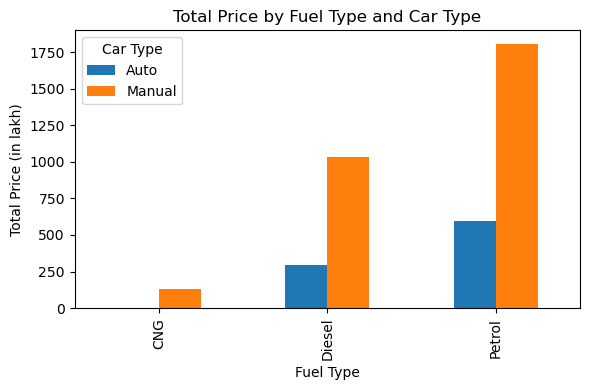

In [285]:
pivot_df = df.pivot_table(index="Fuel_Type", columns="Car_Type", values="Price(lakh)", aggfunc="sum")
pivot_df.plot(kind="bar", figsize=(6,4))
plt.title("Total Price by Fuel Type and Car Type")
plt.ylabel("Total Price (in lakh)")
plt.xlabel("Fuel Type")
plt.legend(title="Car Type")
plt.tight_layout()
plt.show()

In [201]:
df.groupby(by="brand")["Model"].agg("count")

brand
Audi            1
BMW             1
Chevrolet       2
Datsun          4
Fiat            1
Ford            9
Honda          33
Hyundai       132
Jeep            7
KIA            17
MG             11
Mahindra       37
Maruti        191
Mercedes        1
Nissan         18
Renault        42
Skoda          14
Tata           78
Toyota         13
Volkswagen     21
Name: Model, dtype: int64

In [202]:
df['Model'].count()

633

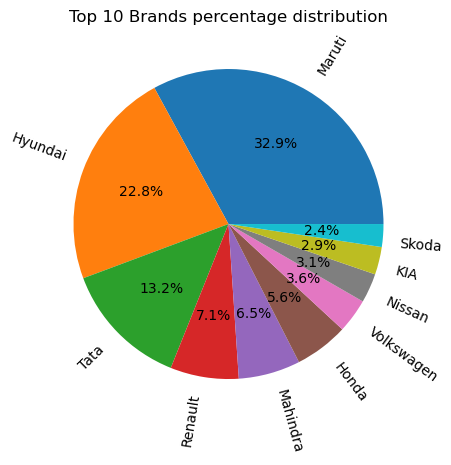

In [341]:
brand_counts=df["brand"].value_counts(normalize=True).nlargest(10)*100
plt.figure(figsize=(5,20))
plt.pie(brand_counts,labels=brand_counts.index,rotatelabels=True,autopct='%1.1f%%')
plt.title("Top 10 Brands percentage distribution")
plt.show()

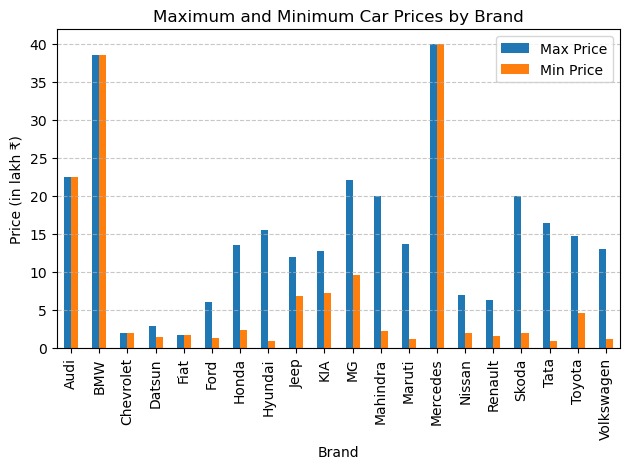

In [288]:
df.groupby("brand")["Price(lakh)"].agg(["max","min"]).plot(kind = "bar") 
plt.title("Maximum and Minimum Car Prices by Brand")
plt.ylabel("Price (in lakh ₹)")
plt.xlabel("Brand")
plt.legend(["Max Price", "Min Price"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [707]:
df.pivot_table(index = "Car_owner_Type", columns = "brand", values = "Price(lakh)",aggfunc=["max"])

max                                                           \
brand           Audi   BMW Chevrolet Datsun  Fiat  Ford  Honda Hyundai   Jeep   
Car_owner_Type                                                                  
1st  owner       NaN  38.5       1.9   2.88  1.72  5.68  13.50   15.50  11.99   
2nd  owner      22.5   NaN       NaN   2.15   NaN  6.00   9.09    9.45   6.79   

                                                                            \
brand             KIA     MG Mahindra Maruti Mercedes Nissan Renault Skoda   
Car_owner_Type                                                               
1st  owner      12.75  22.00     20.0  13.64     39.9   6.89    6.30  20.0   
2nd  owner      11.76  13.06     18.7   9.95      NaN   4.25    5.02  11.0   

                                         
brand            Tata Toyota Volkswagen  
Car_owner_Type                           
1st  owner      16.35  14.75       13.0  
2nd  owner       7.71  13.80        6.2

In [708]:
df["Car_owner_Type"].str.strip().unique()

array(['2nd  owner', '1st  owner'], dtype=object)

<Axes: xlabel='Manufacture Year', ylabel='Price(lakh)'>

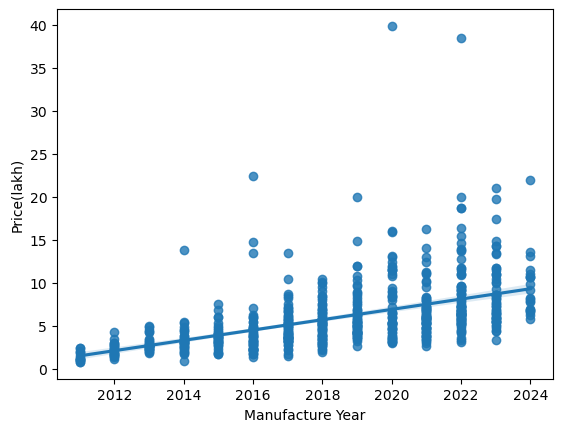

In [709]:
sns.regplot(x = df["Manufacture Year"], y = df["Price(lakh)"])

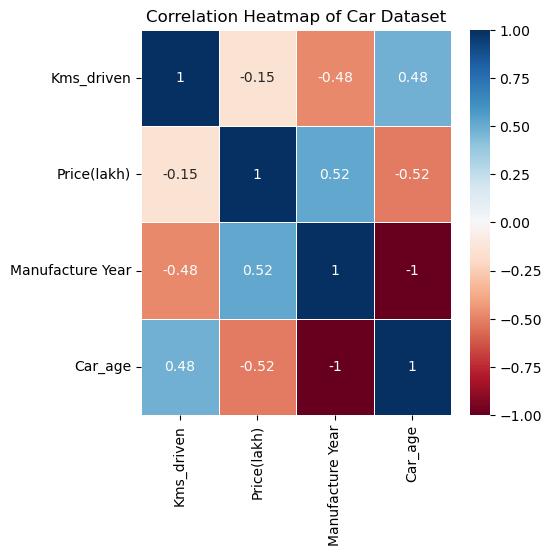

In [710]:
df_numeric = df.select_dtypes(include=["float", "int"])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu", linewidths=0.5)
plt.title("Correlation Heatmap of Car Dataset")
plt.show()

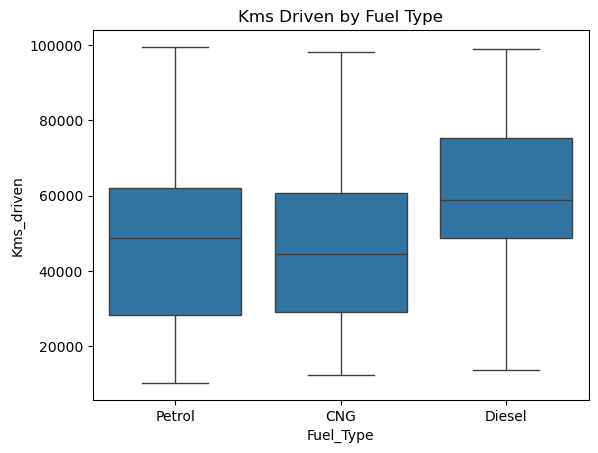

In [711]:
sns.boxplot(x='Fuel_Type', y="Kms_driven", data=df)
plt.title('Kms Driven by Fuel Type')
plt.show()

<Axes: xlabel='Price(lakh)', ylabel='Count'>

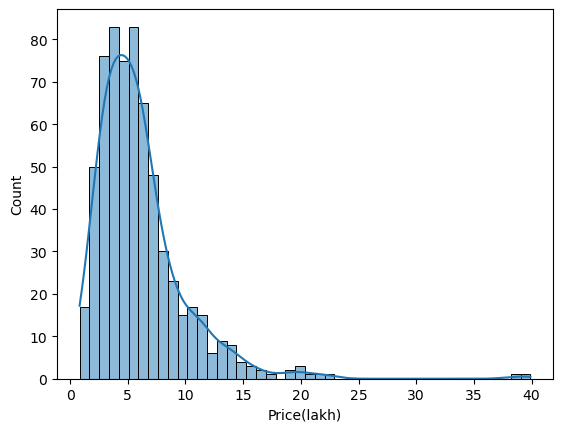

In [712]:
sns.histplot(df['Price(lakh)'],kde=True)

In [713]:
df["Manufacture Year"].value_counts().sort_index()

Manufacture Year
2011    14
2012    22
2013    28
2014    31
2015    34
2016    48
2017    62
2018    65
2019    59
2020    55
2021    67
2022    81
2023    53
2024    21
Name: count, dtype: int64

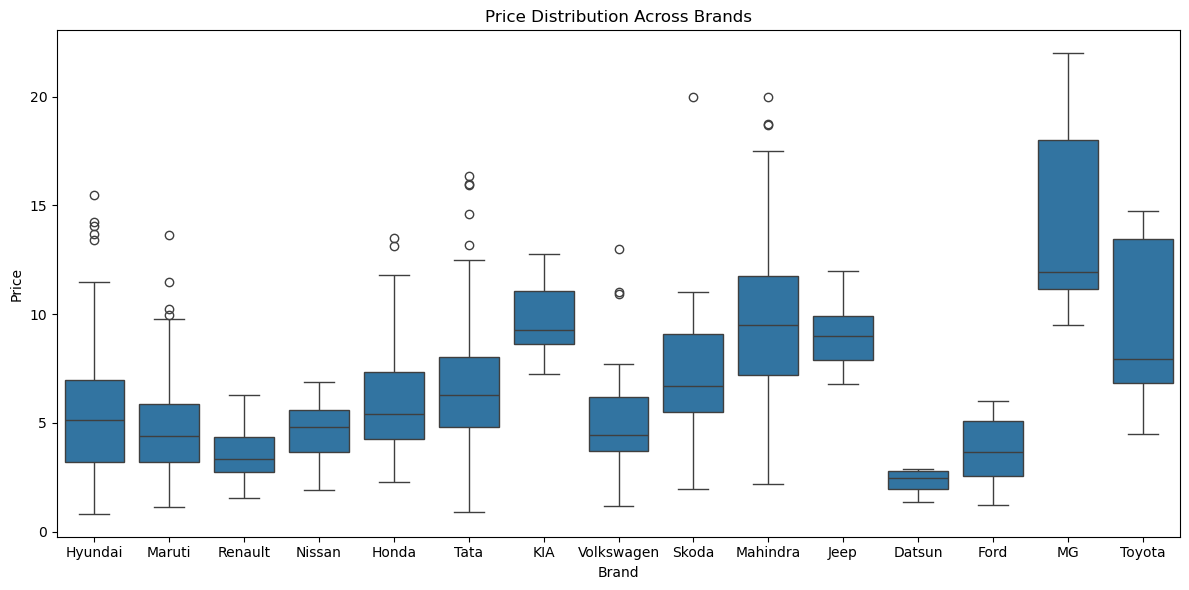

In [714]:
top_brands = df['brand'].value_counts().nlargest(15).index
df_filtered = df[df['brand'].isin(top_brands)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='brand', y='Price(lakh)')
plt.title('Price Distribution Across Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

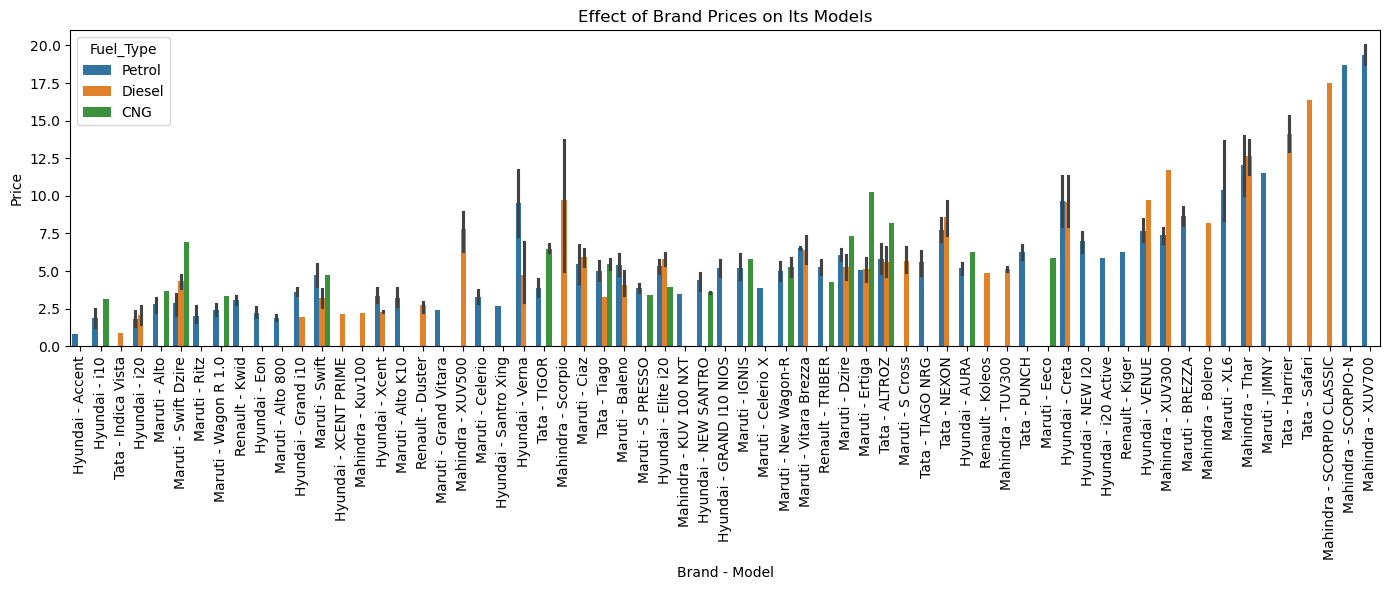

In [715]:
top_brands = df['brand'].value_counts().nlargest(5).index
df_filtered = df[df['brand'].isin(top_brands)]
df_filtered['brand_model'] = df_filtered['brand'] + ' - ' + df_filtered['Model']
df_sorted = df_filtered.sort_values(by='Price(lakh)')
plt.figure(figsize=(14, 6))
sns.barplot(data=df_sorted, x='brand_model', y='Price(lakh)',hue="Fuel_Type")
plt.xticks(rotation=90)
plt.title('Effect of Brand Prices on Its Models')
plt.xlabel('Brand - Model')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

<Axes: xlabel='Fuel_Type', ylabel='Price(lakh)'>

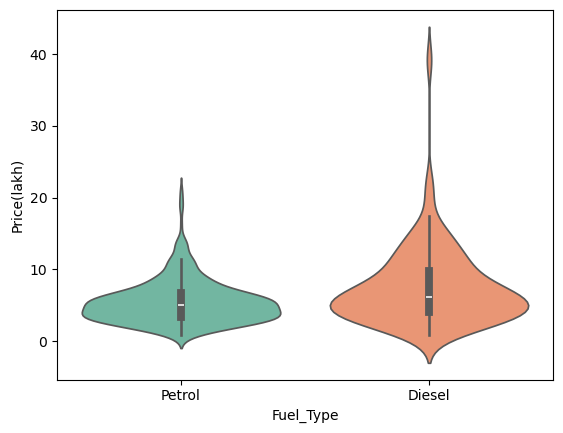

In [716]:
sns.violinplot(data=df_fuel, x='Fuel_Type', y='Price(lakh)', palette='Set2')

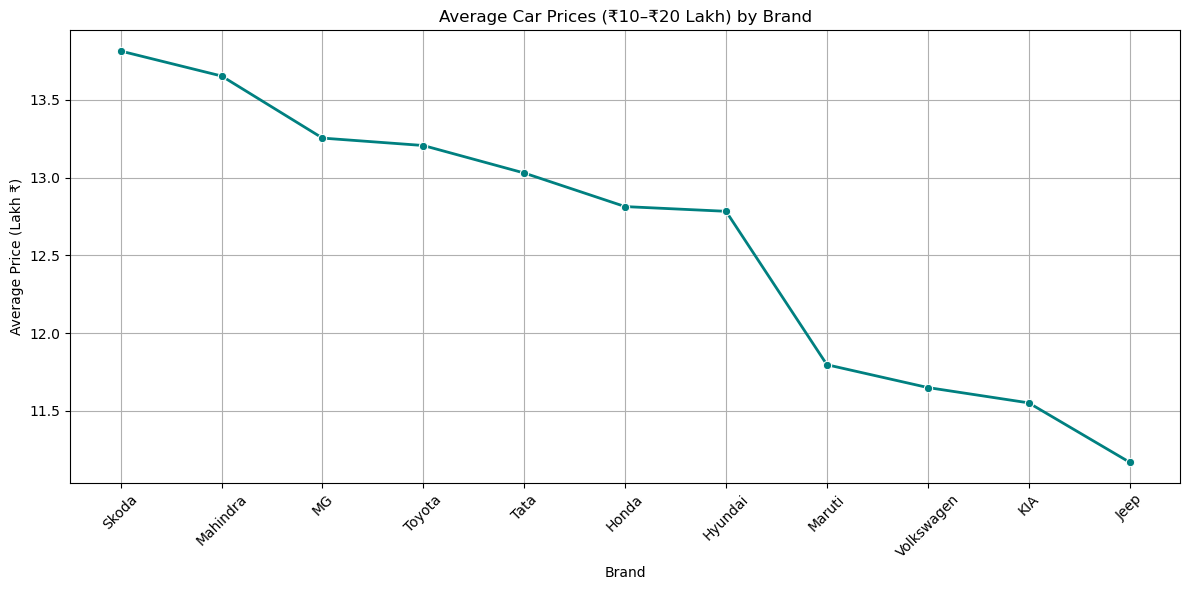

In [717]:
filtered_df = df[(df["Price(lakh)"] > 10) & (df["Price(lakh)"] <=20)]
avg_prices = (filtered_df.groupby("brand", as_index=False)["Price(lakh)"].mean().sort_values(by="Price(lakh)", ascending=False))
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_prices, x="brand", y="Price(lakh)", marker="o", linewidth=2, color='teal')
plt.title("Average Car Prices (₹10–₹20 Lakh) by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price (Lakh ₹)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
df["Price(lakh)"].skew()

2.8846791069449007

In [61]:
df["Price(lakh)"].mean()     

6.03925